In [1]:
import numpy as np

In [5]:
class DualGradientDescent:
    def __init__(self, gamma, epsilon, n):
        self.gamma   = gamma
        self.epsilon = epsilon
        self.n       = n
        self.small     = 1e-20
        
        self.lam = np.zeros(n)
        self.mu     = np.zeros(n)
        self.x_sum  = np.zeros([n, n])
        self.x_0    = np.ones([n, n]) / (n**2)
    
    def f(self, x):
        return (self.c * x).sum() + self.gamma * ((x + self.small) * np.log((x + self.small) / self.x_0)).sum()
    
    def phi(self, lam, mu, n):
        return (lam * self.p).sum() + (mu * self.q).sum() + \
                self.gamma * np.log(1/np.e * (self.x_0 * np.exp(
                    -(self.gamma + self.c + lam.repeat(n).reshape(-1, n) + mu.repeat(n).reshape(-1, n).T) / self.gamma
                )).sum())
        
    def x_hat(self, lam, mu, n):
        x_hat = self.x_0 * np.exp(
            -(self.gamma + self.c + lam.repeat(n).reshape(-1, n) + mu.repeat(n).reshape(-1, n).T) / self.gamma
        )
        return x_hat / x_hat.sum()
    
    def _new_lm(self, p, q):
        x_hat = self.x_hat(self.lam, self.mu, self.n)
        return self.lam - self.gamma * (p - x_hat.sum(1)),\
               self.mu - self.gamma * (q - x_hat.sum(0))
        
    def x_sum_update(self):
        self.x_sum += self.x_hat(self.lam, self.mu, self.n)
        
    def _new_x_wave(self, k):
        return self.x_sum * 1/k
    
    def deviation_p_q(self, x, p, q):
        return np.sqrt(np.sum((x.sum(1) - p)**2) + np.sum((x.sum(0) - q)**2))
    
    def fit(self, c, p, q):
        self.c, self.p, self.q = c, p, q
        
        k = 1
        while True:
            self.lam, self.mu = self._new_lm(self.p, self.q)
            self.x_sum_update()
            self.x_wave = self._new_x_wave(k)
            R = np.sqrt(np.linalg.norm(self.lam) + np.linalg.norm(self.mu))
            epsilon_wave = self.epsilon / R
            
            criteria_a = self.deviation_p_q(self.x_wave, self.p, self.q) < epsilon_wave
            criteria_b = self.f(self.x_wave) + self.phi(self.lam, self.mu, self.n) < self.epsilon
            
            if k % 5000 == 0:
                print(f'iteration {k}:   criteria 1 = {round(self.deviation_p_q(self.x_wave, self.p, self.q), 7)}, ' + \
                                       f'criteria 2 = {round(self.f(self.x_wave) + self.phi(self.lam, self.mu, self.n), 7)}')
            
            if criteria_a and criteria_b:
                return self.x_wave, k
            
            k += 1

In [6]:
def sample_batch(n):
    c = np.random.uniform(0, 10, size=[n, n])
    p = np.random.dirichlet(np.ones(n), size=1).ravel()
    q = np.random.dirichlet(np.ones(n), size=1).ravel()
    return c, p, q

In [7]:
n = 40
c, p, q = sample_batch(n)
x, k = DualGradientDescent(gamma=0.005, epsilon=1e-2, n=n).fit(c, p, q)

iteration 5000:   criteria 1 = 0.1037086, criteria 2 = -0.2670823
iteration 10000:   criteria 1 = 0.0709462, criteria 2 = -0.2507495
iteration 15000:   criteria 1 = 0.0527472, criteria 2 = -0.2085851
iteration 20000:   criteria 1 = 0.0436398, criteria 2 = -0.1909576
iteration 25000:   criteria 1 = 0.0379418, criteria 2 = -0.1807117
iteration 30000:   criteria 1 = 0.0336026, criteria 2 = -0.1698619
iteration 35000:   criteria 1 = 0.030399, criteria 2 = -0.1618703
iteration 40000:   criteria 1 = 0.0278717, criteria 2 = -0.1552768
iteration 45000:   criteria 1 = 0.0258347, criteria 2 = -0.1499032
iteration 50000:   criteria 1 = 0.0240313, criteria 2 = -0.144047
iteration 55000:   criteria 1 = 0.022439, criteria 2 = -0.1381866
iteration 60000:   criteria 1 = 0.0210842, criteria 2 = -0.1330729
iteration 65000:   criteria 1 = 0.019612, criteria 2 = -0.1250897
iteration 70000:   criteria 1 = 0.0182939, criteria 2 = -0.1177615
iteration 75000:   criteria 1 = 0.017137, criteria 2 = -0.111258
it

In [8]:
import sys
sys.path.append("experiments/")

In [9]:
from lib import Experiments

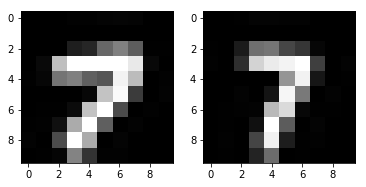

In [11]:
c_, p_, q_ = Experiments.load_data('experiments/test_data/1.png', 'experiments/test_data/2.png', show=True, size=10)
n = p_.shape[0]

In [13]:
x, k = DualGradientDescent(gamma=0.005, epsilon=1e-2, n=n).fit(c_, p_, q_)

iteration 5000:   criteria 1 = 0.0817387, criteria 2 = -0.1770233
iteration 10000:   criteria 1 = 0.0728411, criteria 2 = -0.2747334
iteration 15000:   criteria 1 = 0.0590953, criteria 2 = -0.2712452
iteration 20000:   criteria 1 = 0.0500926, criteria 2 = -0.2599906
iteration 25000:   criteria 1 = 0.0434208, criteria 2 = -0.2445487
iteration 30000:   criteria 1 = 0.0386093, criteria 2 = -0.2323829
iteration 35000:   criteria 1 = 0.0349125, criteria 2 = -0.2214622
iteration 40000:   criteria 1 = 0.0316803, criteria 2 = -0.2082871
iteration 45000:   criteria 1 = 0.028915, criteria 2 = -0.1956625
iteration 50000:   criteria 1 = 0.0265352, criteria 2 = -0.1837594
iteration 55000:   criteria 1 = 0.0245226, criteria 2 = -0.173314
iteration 60000:   criteria 1 = 0.0228271, criteria 2 = -0.1643985
iteration 65000:   criteria 1 = 0.0212783, criteria 2 = -0.1553037
iteration 70000:   criteria 1 = 0.0199171, criteria 2 = -0.1470554
iteration 75000:   criteria 1 = 0.0187294, criteria 2 = -0.139785

In [14]:
x

array([[2.35421478e-004, 3.25798965e-091, 2.33386441e-135, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [3.25798965e-091, 2.35421478e-004, 1.68644430e-048, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [7.32827260e-180, 5.29539056e-093, 3.72401186e-004, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       ...,
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        2.33182380e-004, 3.19091361e-091, 4.41589426e-178],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        3.40594786e-091, 2.35421478e-004, 3.25798965e-091],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        4.71347941e-178, 3.25798965e-091, 2.35421478e-004]])